# Initial notebook to get started with PatchTST and etth1

## starting train.py from notebook cell

- equivalent to ```python experiments/train.py -c baselines/${MODEL_NAME}/${DATASET_NAME}.py --gpus '0'```

In [8]:
# TAKEN FROM train.py

# Run a baseline model in BasicTS framework.
# pylint: disable=wrong-import-position
import os
import sys
from argparse import ArgumentParser

__file__ = "/home/kreffert/Probabilistic_LTSF/BasicTS/experiments/train.py"
sys.path.append(os.path.abspath(__file__ + '/../..'))
os.chdir(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))
sys.argv = [__file__]

import torch
import basicts

torch.set_num_threads(4) # aviod high cpu avg usage

def parse_args():
    parser = ArgumentParser(description='Run time series forecasting model in BasicTS framework!')
    parser.add_argument('-c', '--cfg', default='baselines/STID/PEMS04.py', help='training config')
    parser.add_argument('-g', '--gpus', default='0', help='visible gpus')
    return parser.parse_args()

args = parse_args()
basicts.launch_training(args.cfg, args.gpus, node_rank=0)

2025-03-04 12:10:39,839 - easytorch-launcher - INFO - Launching EasyTorch training.
2025-03-04 12:10:39,863 - easytorch-env - INFO - Use devices 0.
2025-03-04 12:10:39,882 - easytorch-launcher - INFO - Initializing runner "<class 'basicts.runners.runner_zoo.simple_tsf_runner.SimpleTimeSeriesForecastingRunner'>"
2025-03-04 12:10:39,882 - easytorch-env - INFO - Disable TF32 mode
2025-03-04 12:10:39,883 - easytorch - INFO - Set ckpt save dir: 'checkpoints/STID/PEMS04_100_12_12/ccb0f681b7b89e2df41388e9c8c97424'
2025-03-04 12:10:39,883 - easytorch - INFO - Building model.


DESCRIPTION: An Example Config
GPU_NUM: 1
RUNNER: <class 'basicts.runners.runner_zoo.simple_tsf_runner.SimpleTimeSeriesForecastingRunner'>
DATASET:
  NAME: PEMS04
  TYPE: <class 'basicts.data.simple_tsf_dataset.TimeSeriesForecastingDataset'>
  PARAM:
    dataset_name: PEMS04
    train_val_test_ratio: [0.6, 0.2, 0.2]
    input_len: 12
    output_len: 12
SCALER:
  TYPE: <class 'basicts.scaler.z_score_scaler.ZScoreScaler'>
  PARAM:
    dataset_name: PEMS04
    train_ratio: 0.6
    norm_each_channel: False
    rescale: True
MODEL:
  NAME: STID
  ARCH: <class 'baselines.STID.arch.stid_arch.STID'>
  PARAM:
    num_nodes: 307
    input_len: 12
    input_dim: 3
    embed_dim: 32
    output_len: 12
    num_layer: 3
    if_node: True
    node_dim: 32
    if_T_i_D: True
    if_D_i_W: True
    temp_dim_tid: 32
    temp_dim_diw: 32
    time_of_day_size: 288
    day_of_week_size: 7
  FORWARD_FEATURES: [0, 1, 2]
  TARGET_FEATURES: [0]
METRICS:
  FUNCS:
    MAE: masked_mae
    MAPE: masked_mape
    RM

2025-03-04 12:10:40,223 - easytorch-training - INFO - Initializing training.
2025-03-04 12:10:40,224 - easytorch-training - INFO - Set clip grad, param: {'max_norm': 5.0}
2025-03-04 12:10:40,225 - easytorch-training - INFO - Building training data loader.
2025-03-04 12:10:40,252 - easytorch-training - INFO - Train dataset length: 10173
2025-03-04 12:10:41,866 - easytorch-training - INFO - Set optim: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.002
    maximize: False
    weight_decay: 0.0001
)
2025-03-04 12:10:41,867 - easytorch-training - INFO - Set lr_scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f5ec51b2a90>
2025-03-04 12:10:41,871 - easytorch-training - INFO - Initializing validation.
2025-03-04 12:10:41,872 - easytorch-training - INFO - Building val data loader.
2025-03-04 12:10:41,885 - easytorch-training - INFO - Validation dataset len

KeyboardInterrupt: 

## visualizing the results of a trained model

DESCRIPTION: An Example Config
GPU_NUM: 1
RUNNER: <class 'basicts.runners.runner_zoo.simple_tsf_runner.SimpleTimeSeriesForecastingRunner'>
DATASET:
  NAME: ETTh1
  TYPE: <class 'basicts.data.simple_tsf_dataset.TimeSeriesForecastingDataset'>
  PARAM:
    dataset_name: ETTh1
    train_val_test_ratio: [0.6, 0.2, 0.2]
    input_len: 336
    output_len: 336
SCALER:
  TYPE: <class 'basicts.scaler.z_score_scaler.ZScoreScaler'>
  PARAM:
    dataset_name: ETTh1
    train_ratio: 0.6
    norm_each_channel: True
    rescale: False
MODEL:
  NAME: PatchTST
  ARCH: <class 'baselines.PatchTST.arch.patchtst_arch.PatchTST'>
  PARAM:
    enc_in: 7
    seq_len: 336
    pred_len: 336
    e_layers: 3
    n_heads: 4
    d_model: 16
    d_ff: 128
    dropout: 0.3
    fc_dropout: 0.3
    head_dropout: 0.0
    patch_len: 16
    stride: 8
    individual: 0
    padding_patch: end
    revin: 1
    affine: 0
    subtract_last: 0
    decomposition: 0
    kernel_size: 25
  FORWARD_FEATURES: [0]
  TARGET_FEATURES: [0]

35it [00:01, 19.24it/s]


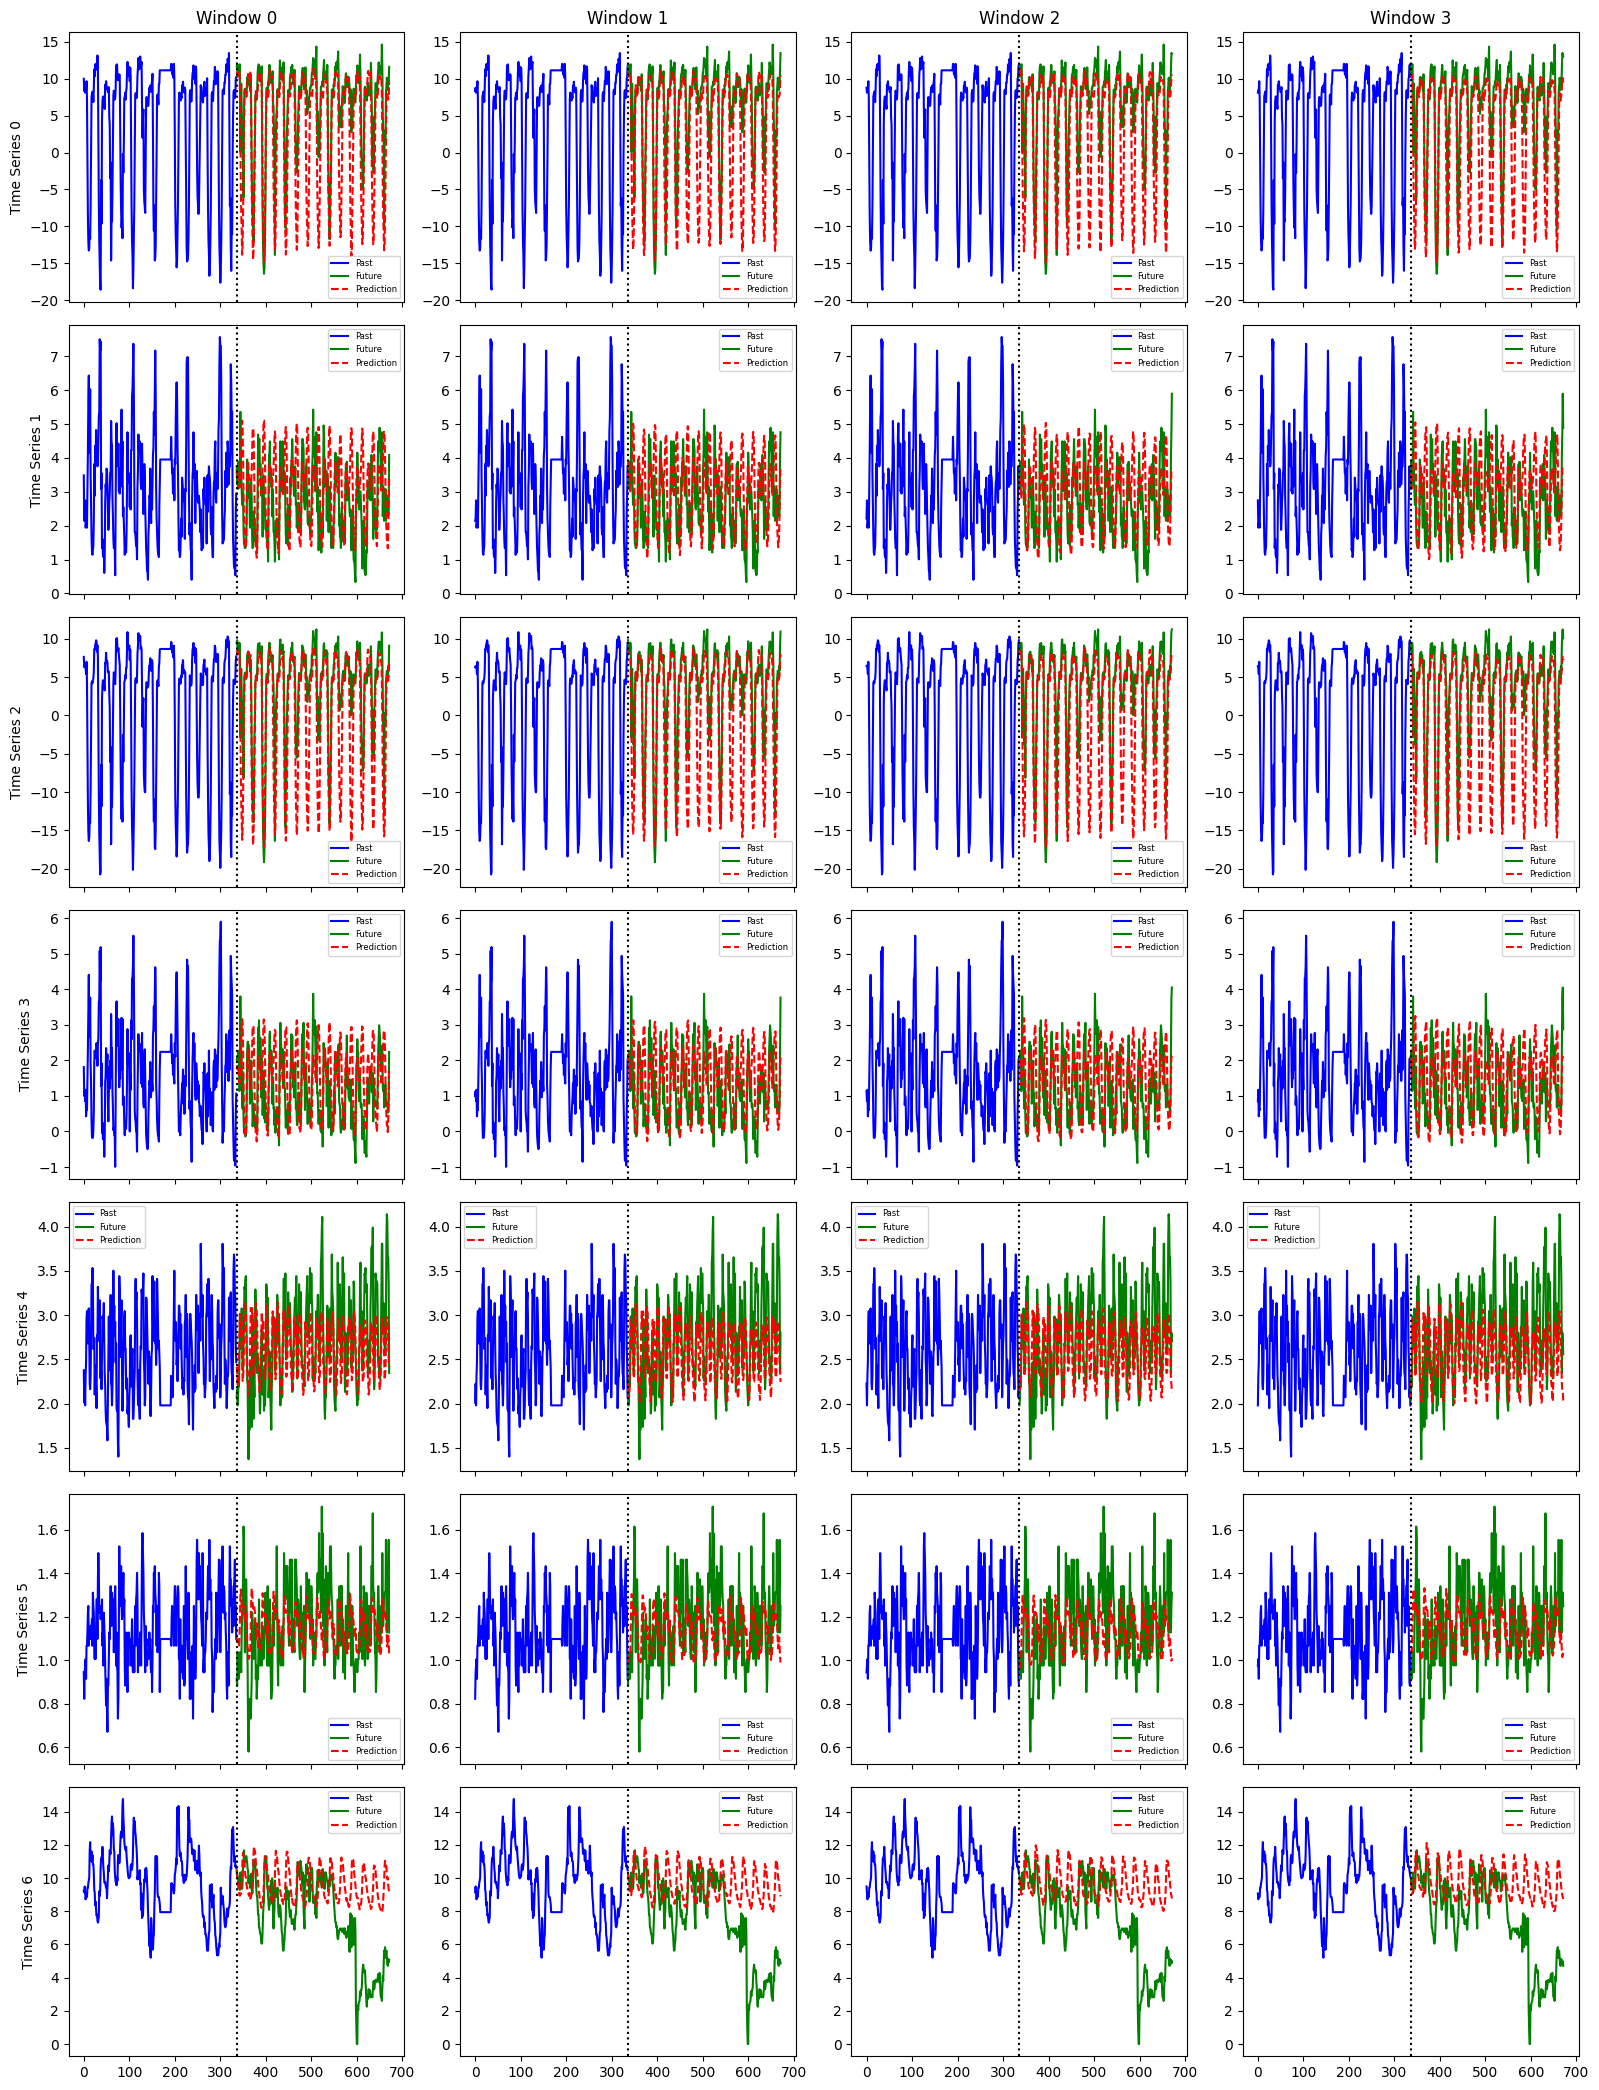

In [1]:
import matplotlib.pyplot as plt
from utils import *

runner = init(model='PatchTST', dataset='ETTh1', no_logging=True)

predictions, past_actuals, future_actuals = get_predictions(runner, data_loader="test")

windows = [0, 1, 2, 3]
series = [0, 1, 2, 3, 4, 5, 6]
plot_time_series(past_actuals, future_actuals, predictions, windows, series, ci=None, quantile_levels=None)

35


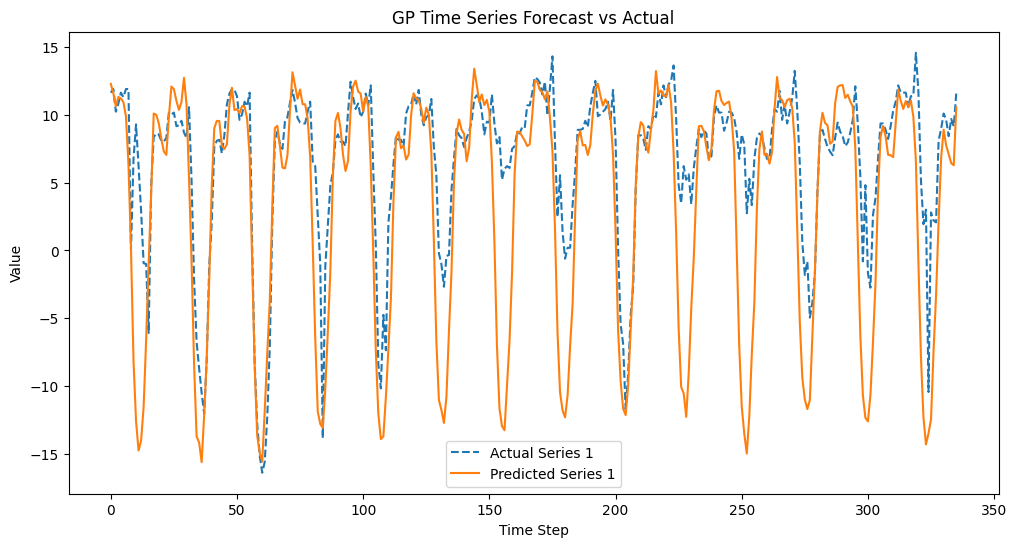

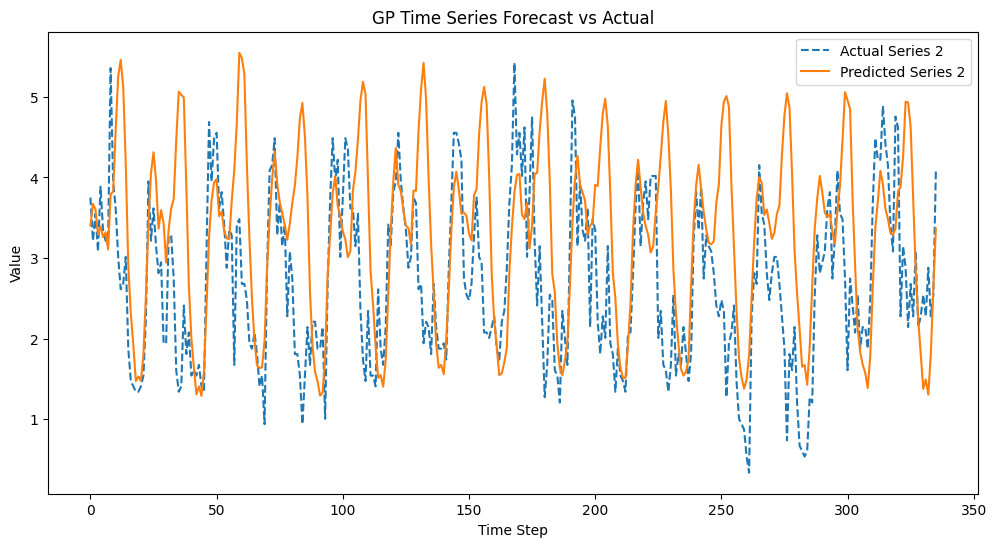

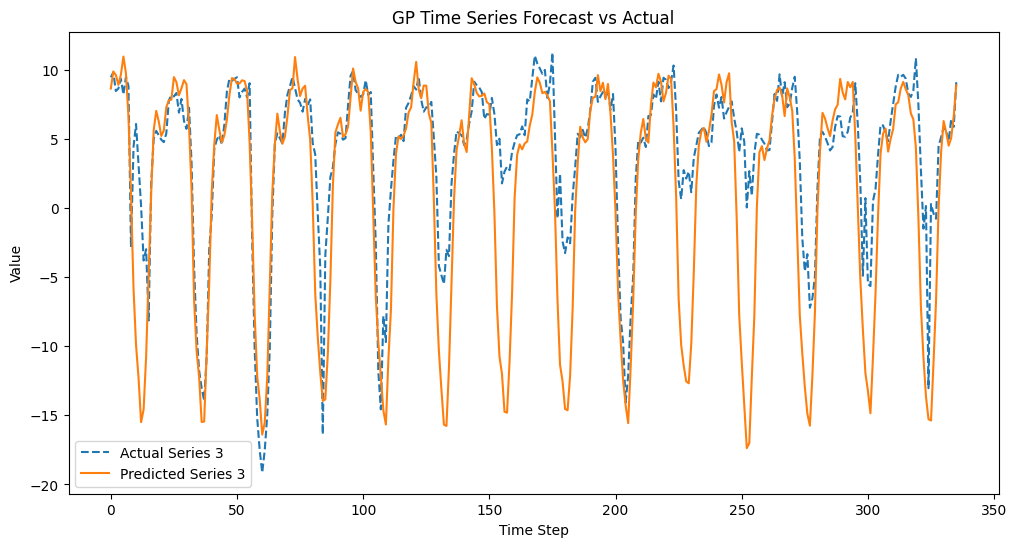

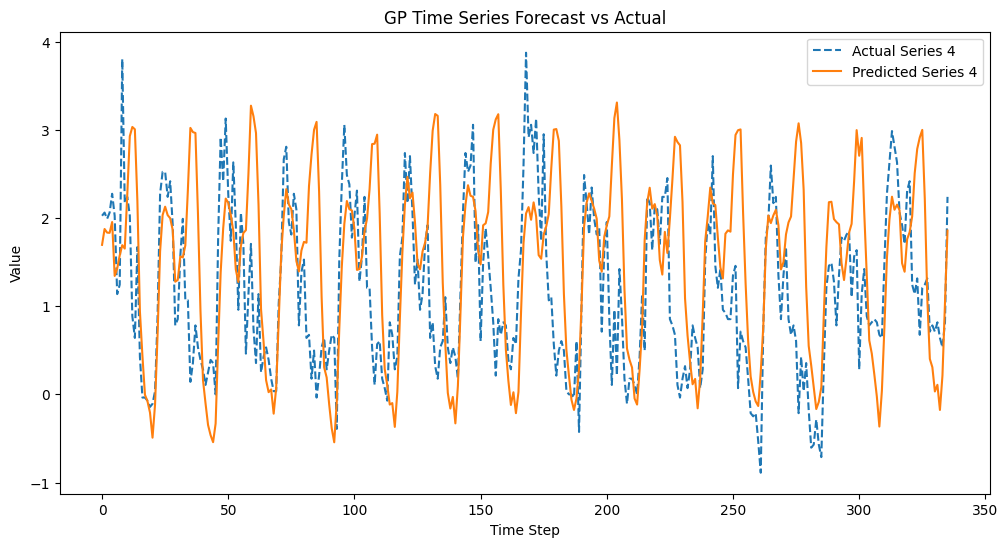

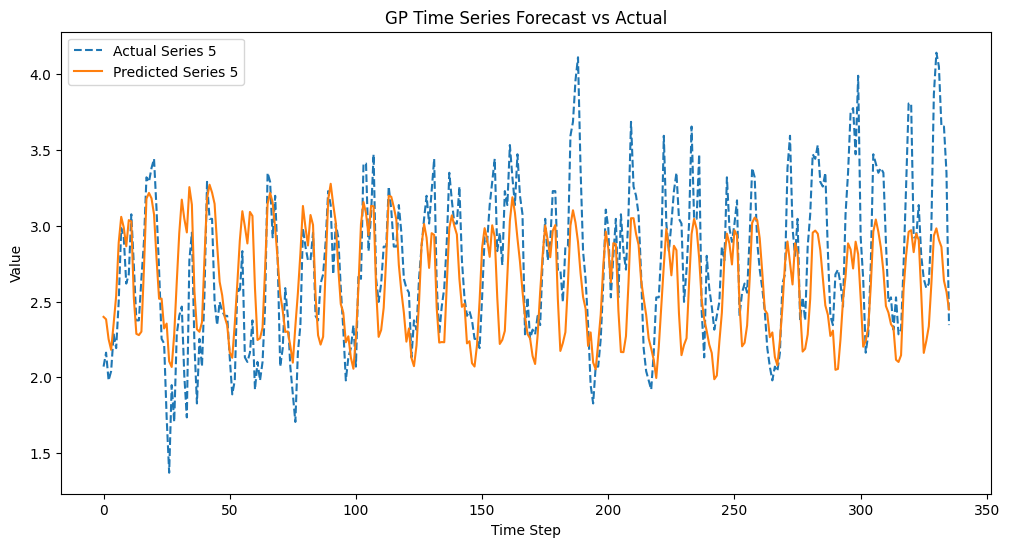

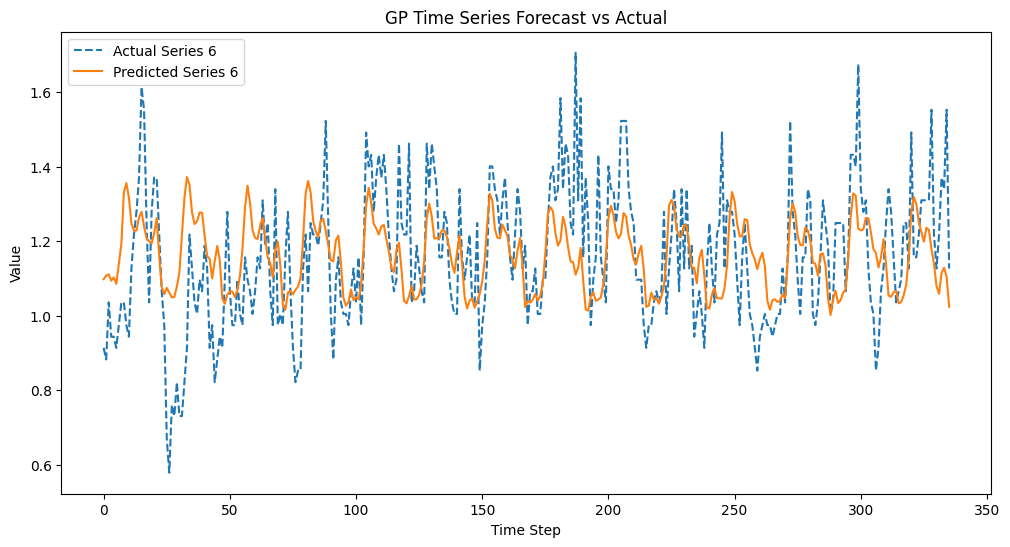

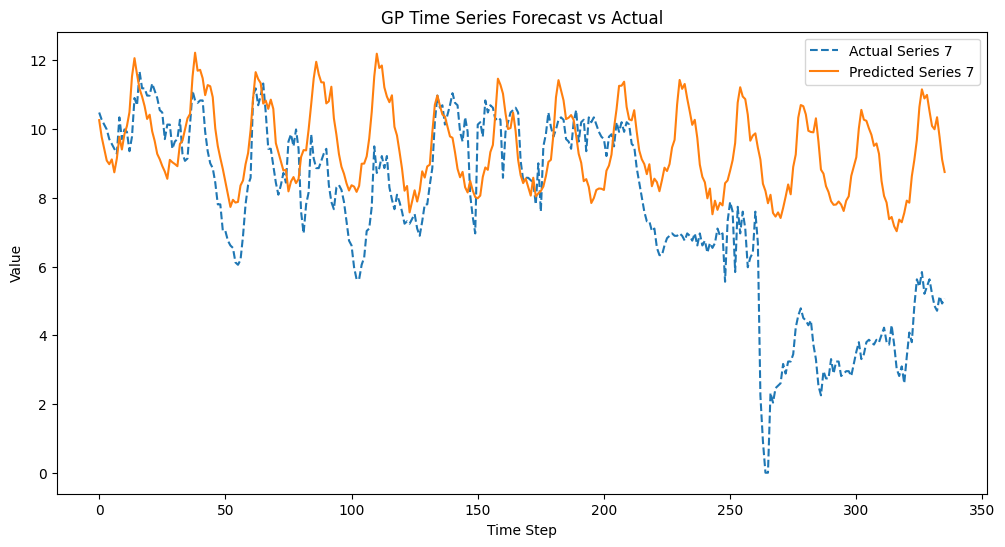

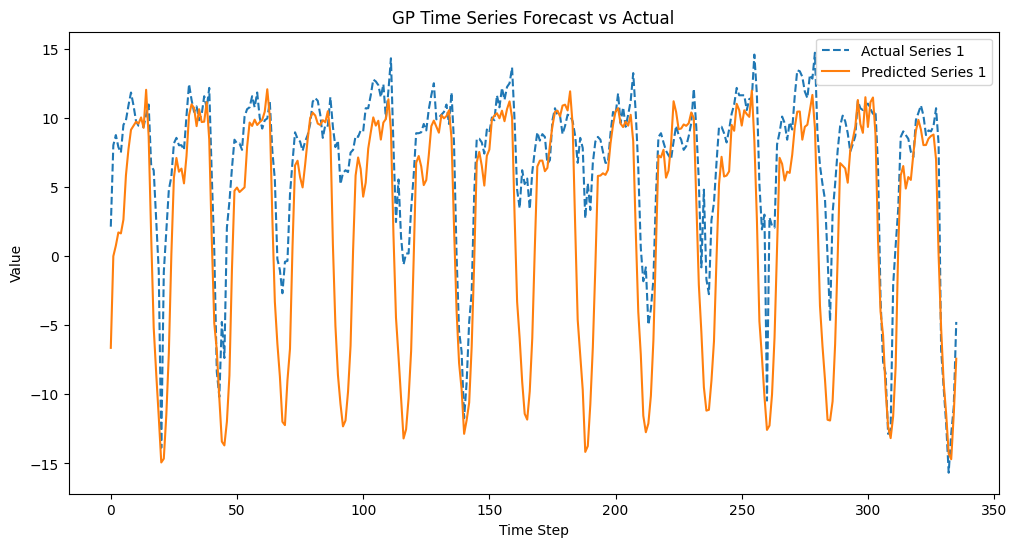

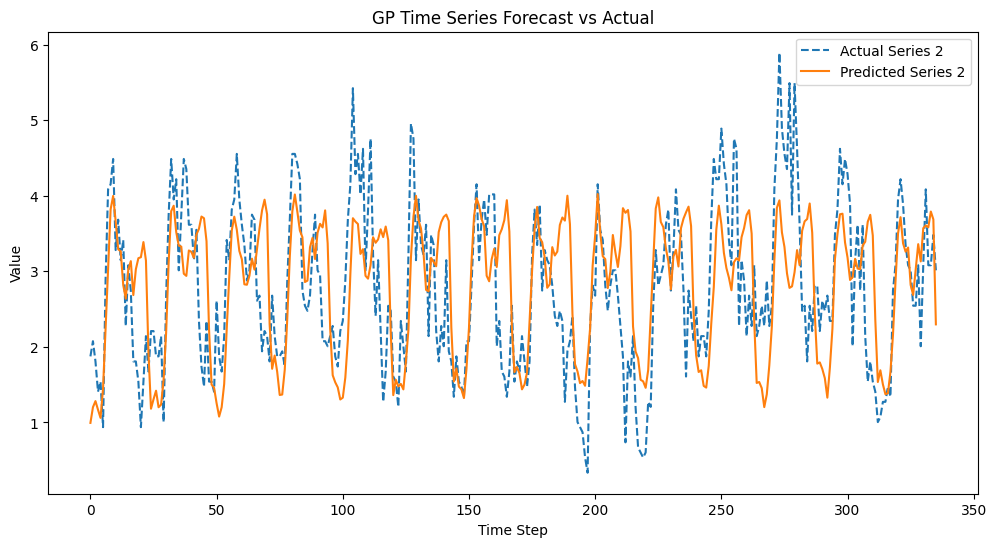

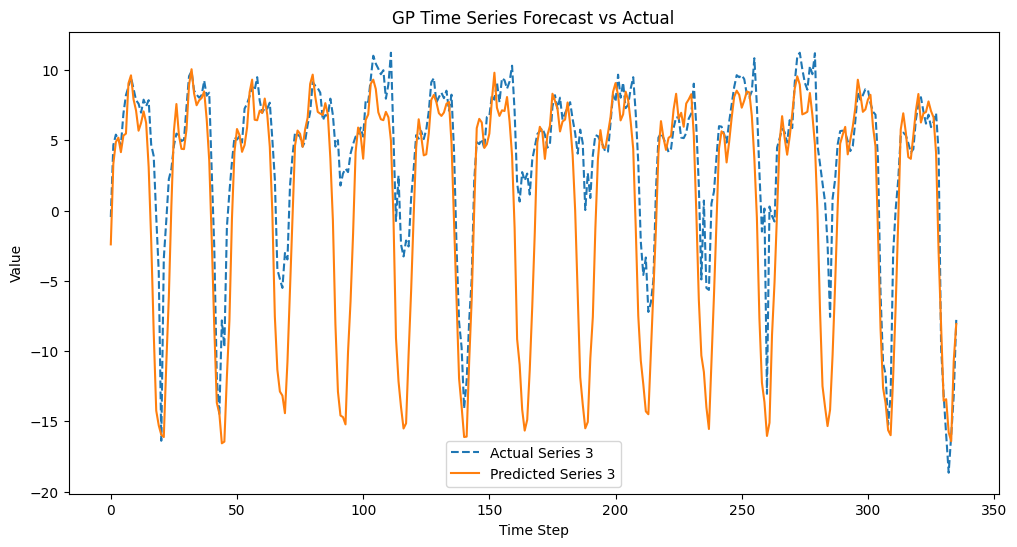

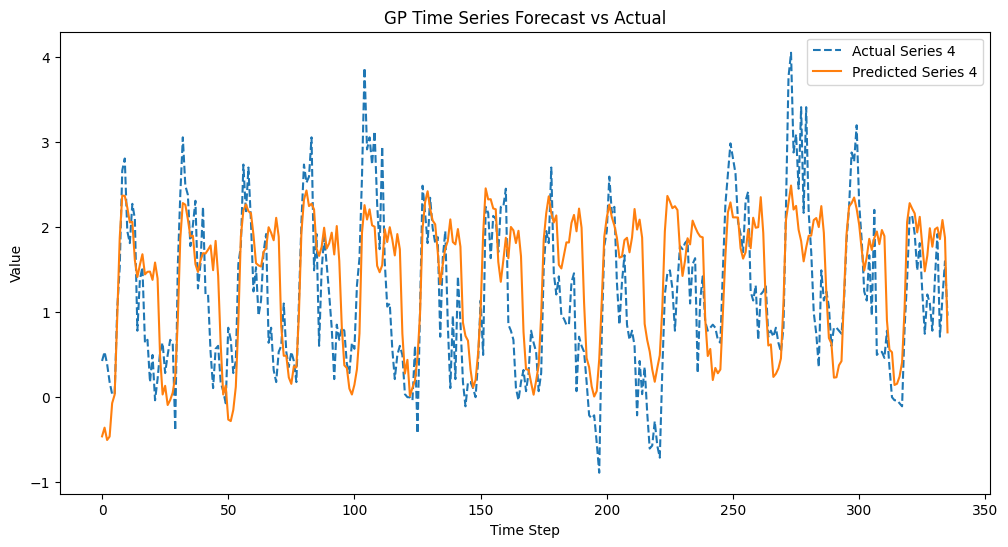

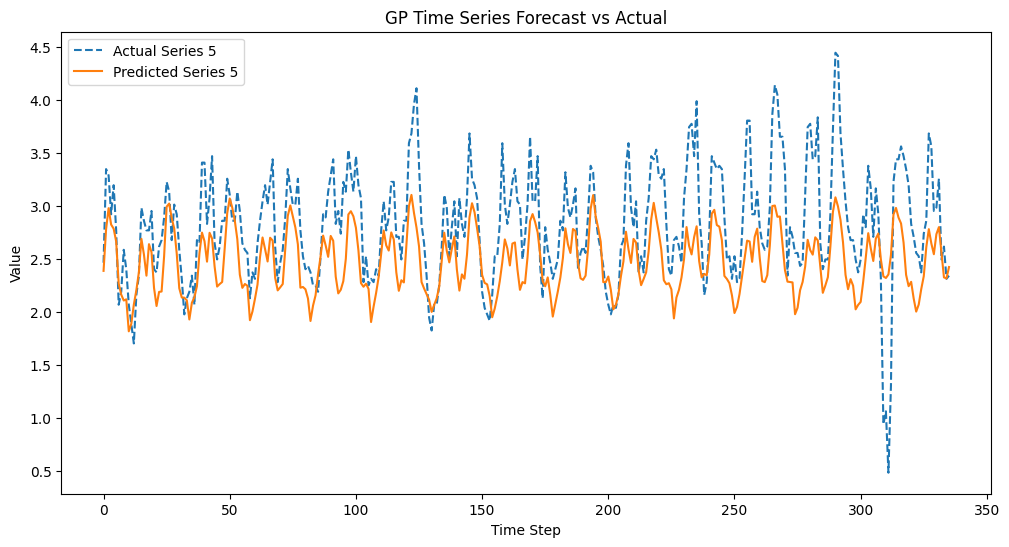

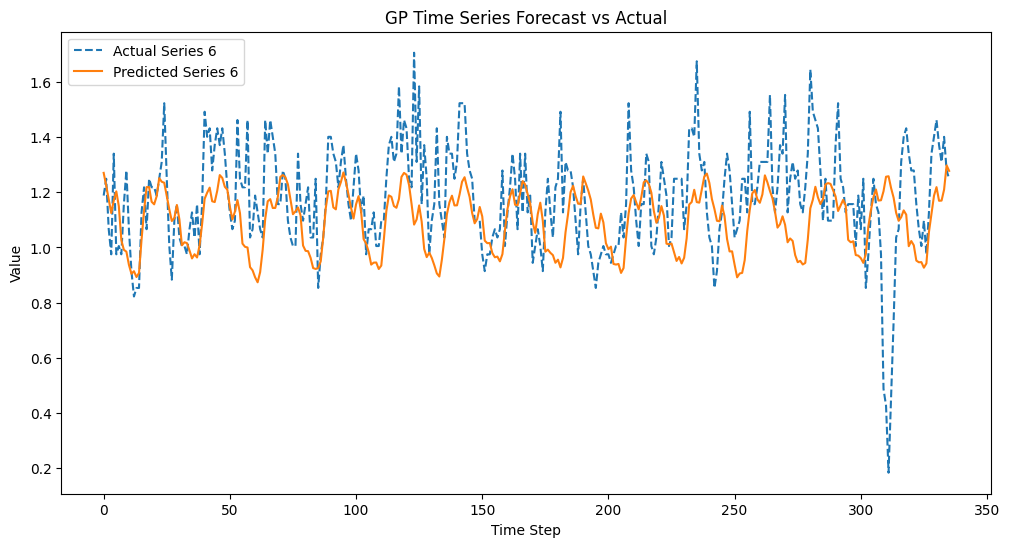

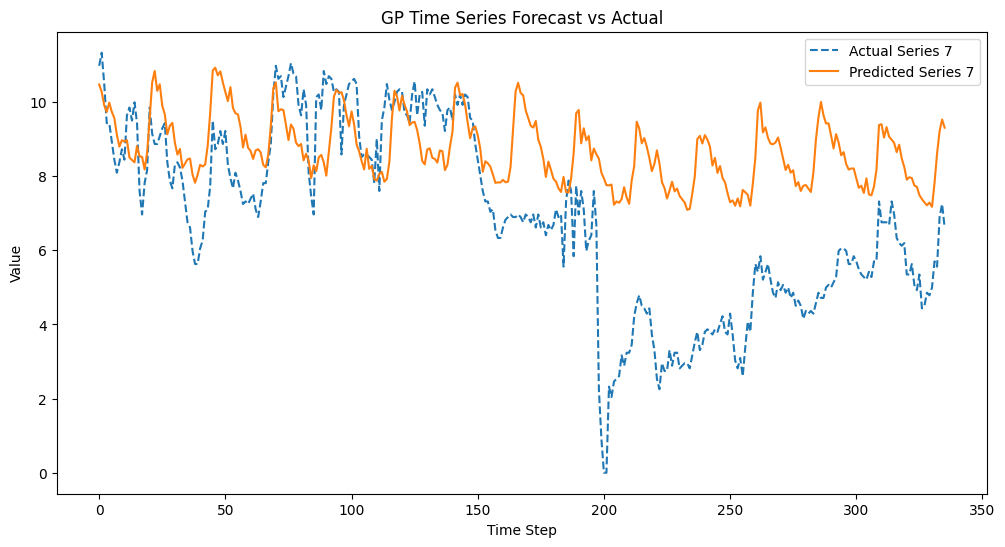

In [ ]:
# load weights of the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(len(runner.test_data_loader))
for i, batch in enumerate(runner.test_data_loader):# batch consists of inputs and targets with shape [64, 336, 7, 5] [Batch size, horizon, num_series, features]
    if i >1:
        break
    history = batch['inputs'][..., :1]     # B, L, N -> i.e. ignore the remaining features
    targets = batch['target'][..., :1]
    forecasts = runner.model(batch['inputs'][..., :1].to(device), batch['target'].to(device), batch_seen=0, epoch=39, train=False)
    num_series = history.shape[-2]
    history, targets, forecasts = history.to('cpu'), targets.to('cpu'), forecasts.to('cpu') 
    timestamps = torch.arange(history.shape[-3]).to('cpu') 
    # Plot each series independently
    plt.figure(figsize=(12, 6))
    for i in range(num_series):
        plt.plot(timestamps, targets[0, :, i], label=f"Actual Series {i+1}", linestyle="dashed")
        plt.plot(timestamps, forecasts[0, :, i].detach().numpy(), label=f"Predicted Series {i+1}")
        #plt.fill_between(timestamps, lower_cpu[:, i], upper_cpu[:, i], alpha=0.2)
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.title("PatchTST Time Series Forecast vs Actual")
        plt.legend()
        plt.show()